- 이번학기에 수업했던 내용을 본인이 이해한 방식으로 기술하여, 해당 토픽을 처음 듣는 이에게 쉽게 설명할 때 활용할 수 있는 보조자료 수준으로 정리할 것
- 문서의 형태는, '블로그', '리포트', '쥬피터 노트북', 어떤 것이든 상관없음. 단 수기작성한 것은 허용하지 않음
- 문서는 반드시 '공유가능' 한 형태여야 하며, 최종 작성된 것을 올려둔 클라우드 링크를 조교에게 제출할 것
- 기술할 각 주제에 대해서 반드시 아래 항목이 들어가야 함
    a) 왜 이 주제가 중요한지?
    b) 우리 일상생활에 어떻게 적용되는지?
    c) 활용가능한 주요 알고리즘의 이름, 패키지 명
    d) 해당 알고리즘 혹은 주제의 핵심 아이디어

# Clustering

일상생활속에서 우리는 학교를 졸업을 했을것이고 또한 재학중일 것이다. 고등학교를 예시로 들자면 이과학생들의 수학 수업에서 대

부분 다같이 수업을 듣지않고 A반 B반 C반 등 성적에 따라 반을 나눠서 구성한다.

하지만 만약에 성적순으로 라는 기준이 없이 데이터를 그룹화를 시켜야 한다면 어떻게 그룹화를 시켜야하는가?

그에대한 답변이 Clustering이다.

###### Clustering => 데이터들의 유사도에 따라 군집화 시키는 형태


# 왜 우리는 Clustering이 중요할까?


사실 데이터는 중구난방으로 이루어져 있다. 첫번째부터 끝까지 데이터가 딱 기준화 되어있지 않다 이상태에서 우리는 3그룹으로 나

누라고 하면 어떻게 접근할 것인가. Clustering를 통해서 데이터를 나눠 준다면 데이터를 그룹화를 시켜주기 때문에 각 그룹의 특성

을 파악하기 쉽다. 또한 데이터에 대한 이해도 군집화 시키기 전보다 이해하기가 더 쉬울 것이다.


# 그렇다면  Clustering에는 어떠한 기법들이 있을까?

Clustering에는 다양한 방법들이 있다. 그 중에서 종류에 따라 구분 짓자면

1. Partional Clustering (부분 군집화)

2. Hierarchiacl Clustering (계층 군집화)

# Partitional Clustering

객제가 하나의 군집에 배타적으로 속하도록 군집을 형성하는 기법이다. 즉 하나의 데이터의 하나의 군집에 포함되어 있어야 한다는 

뜻이다.


Partitional Clustering들 중에서 자주 쓰이는 방법은 K-MEANS랑 DBSCAN 방식이 있다 이 두가지를 먼저 살펴보도록 한다.



## K-means

가장 간단한 군집 알고리즘으로 초기 값을 설정하여 그 초기 값들을 가지고 군집을 형성한다. 

군집을 형성하기 위해서 유클리디안 거리 공식을 이용하여 거리의 가까움으로 유사도를 측정하여 군집을 형성한다. 

하지만 자동으로 군집의 개수를 설정하는 것이 아니라 우리가 몇 개의 군집을 생성할껀지 정해야 한다.

알고리즘 진행방식은 다음과 같다.

1. 군집을 형성할 개수 선정
2. 각 클러스터의 중심값 설정
3. 각 데이터가 중심값들로부터 가까운지 판단 제일 가까운 곳에 데이터 추가
4. 데이터가 변경되지 않을 때 까지 반복

Detail 

- 초기값을 선정할 때에는 랜덤으로 설정해야 한다.

- 중심값을 갱신할 때에는 데이터들의 평균값으로 갱신해야한다.

- 유사도 측정을 위해서 거리공식을 이용한다.

- 시간복잡도는 점들의 개수 * 군집의 개수 * 반복횟수 * 속성의 갯수로 계산한다.


위와 같은 방식으로 K-MEANS를 구현해보자.

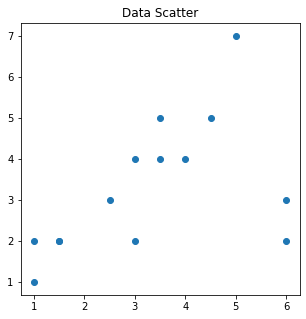

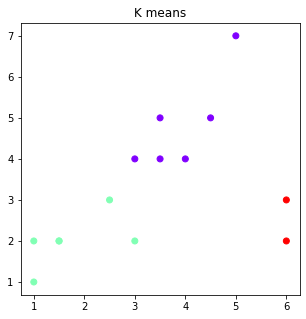

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

my_data = np.array([[1.0 ,1.0],
                    [1.5,2.0],
                    [3.0,4.0],
                    [5.0,7.0],
                    [3.5,5.0],
                    [4.5,5.0],
                    [1.5,2.0],
                    [3.5,4.0],
                    [2.5,3.0],
                    [6.0,3.0],
                    [1.0,2.0],
                    [3.0,2.0],
                    [6.0,2.0],
                    [4.0,4.0]])

fig , ax1 = plt.subplots(1,figsize = (5,5))

ax1.set_title("Data Scatter")
ax1.scatter(my_data[:,0],my_data[:,1])

kmeans = KMeans(n_clusters=3)
# kmeans 라이브러리 이용
kmeans.fit(my_data)
# 데이터를 fit함수를 통해서 적용
center = kmeans.cluster_centers_
# 중심값들을 가진다.
labels = kmeans.labels_
# 라벨 값들

fig , ax1 = plt.subplots(1,figsize = (5,5))

ax1.set_title("K means")
ax1.scatter(my_data[:,0],my_data[:,1],c=labels,cmap = "rainbow")

하지만 이 Kmeans도 안좋을 때가 있다. 아래와 같은 경우가 단점에 해당한다.

- outlier를 감지하지 못한다.
- 사이즈의 영향을 받는다.
- 초기값에 매우 민감하다.

## DBSCAN Clustering

DBSCAN 군집 알고리즘은 Kmeans와는 다르게 밀도 기반 알고리즘이다. 

여기서 밀도는 특정 영역안의 점들의 개수라고 불리우는데 특정 영역을 우리는 Eps라고 부른다.

DBSCAN은 3가지의 점으로 분류되는데 각각의 점들에 대한 설명이다.

- core point : 핵심점이라고도 부르며 정한 점들의 개수들이 Eps안에 있다면 Corepoint이다.

- border point : 경계점이라고도 부르며 핵심점이 아니지만 핵심점이 이웃해 있는 점이다.

- noise point : 핵심점도 아니고 경계점도 아닌 점이다.

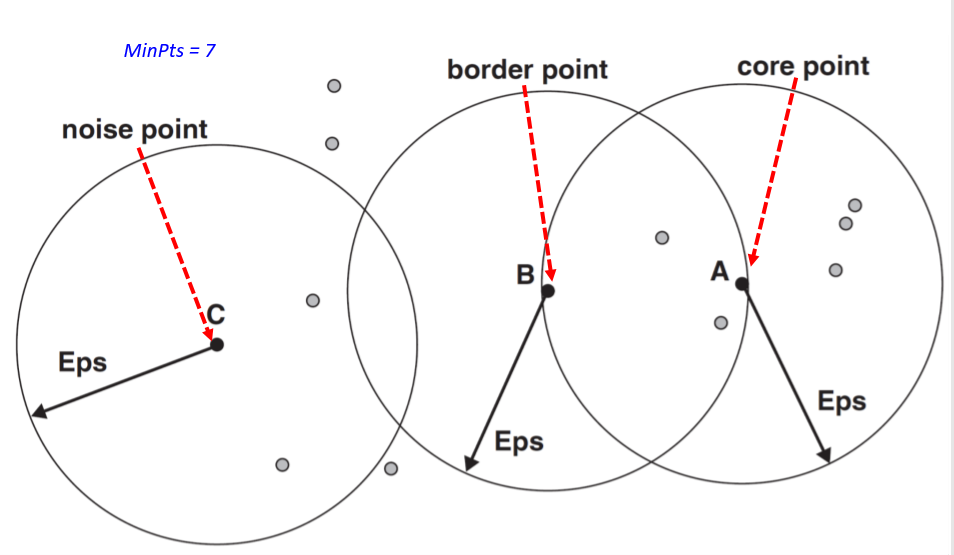

A는 A점을 중심으로 eps를 그렸을때 최소 점개수가 만족하므로 core point

B는 B점을 중심으로 eps를 그렸을때 최소 점개수는 만족하진 않지만 core point가 eps가 안에 있으므로 border point

C는 C점을 중심으로 eps를 그렸을때 최소 점개수도 만족하지 않고 core point가 경계안에 없으므로 noise point이다.

DBSCAN은 어떻게 해서 돌아가는 걸까?

아래 알고리즘 방식이다.
1. 모든점들을핵심점, 경계점, 잡음점으로표시한다.
2. 잡음점들을제거한다
3. 서로간에 EPS의거리내에있는모든핵심점들사이에간선을만든다.
4. 각각의연결된핵심점들의그룹을독립적인군집으로만든다.
5. 각각의경계점들을관련된핵심점의군집들중하나에속하게한다.

위와 같이 라이브러리를 이용하여 구현하도록 한다.

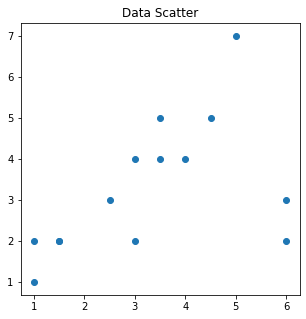

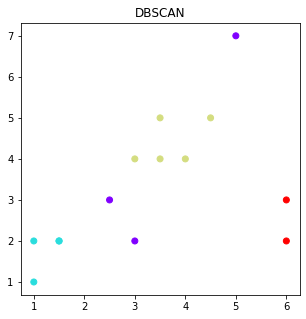

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

my_data_2 = np.array([[1.0 ,1.0],
                    [1.5,2.0],
                    [3.0,4.0],
                    [5.0,7.0],
                    [3.5,5.0],
                    [4.5,5.0],
                    [1.5,2.0],
                    [3.5,4.0],
                    [2.5,3.0],
                    [6.0,3.0],
                    [1.0,2.0],
                    [3.0,2.0],
                    [6.0,2.0],
                    [4.0,4.0]])
fig , ax1 = plt.subplots(1,figsize = (5,5))

ax1.set_title("Data Scatter")
ax1.scatter(my_data_2[:,0],my_data_2[:,1])
dbscan = DBSCAN(eps=1.0, min_samples=2)

dbscan.fit(my_data_2)

labels_2 = dbscan.labels_
# 라벨 값들


fig , ax1 = plt.subplots(1,figsize = (5,5))

ax1.set_title("DBSCAN")
ax1.scatter(my_data_2[:,0],my_data_2[:,1],c=labels_2 ,cmap = "rainbow")

DBSCAN에서 위의 이미지에서 보라색 점이 보일 것이다. 보라색 점이 잡음점 즉 noise에 해당한다.

DBSCAN은 Kmeans와는 다르게 군집의 개수를 설정하지 않아도 자연스럽게 군집이 생성된다.

하지만 DBSCAN이 항상 좋은 것은 아니다. DBSCAN에서 우리는 특정 영역값과 최소의 점 개수를 설정해야 한다.

특정 영역값에 따라서 군집의 형태가 달라질 수 있고 최소의 점 개수에따라서도 군집의 형태가 달라질 수 있다.

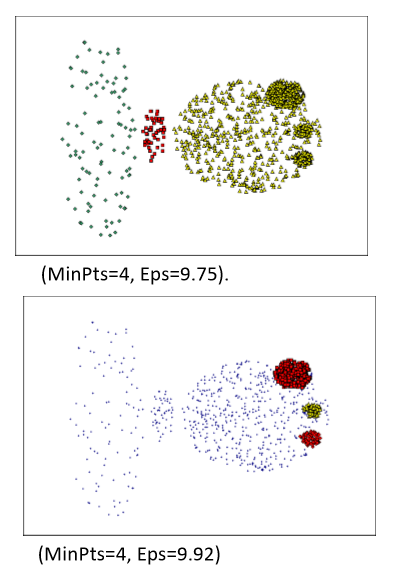

위와 같은 이미지가 그 예이다. 

최소 점의 개수와 EPS를 찾기위해 전처리를 통해서 값을 조정하면서 찾는 방법이 있다.

# Hierarchiacl Clustering (계층 군집화)

계층 군집화는 계층 트리구조를 이용하여 순차적으로 유사한 개체 그룹과 통합화여 군집화를 수행하는 방법이다.

계층 군집화의 장점 같은 경우에는 특정 군집개수를 결정하지 않아도 된다.

계층 군집화에는 두가지 메인 타입이 존재한다.

1. Agglomerative

   - 각 군집들로부터의 점들로 시작하여 가까운 군집과 결합하면서 하나의 클러스터로 남게하는 방법
   
   
2. Divide

   - 전체 군집으로부터 시작하여 클러스터를 분할하면서 여러개의 클러스터로 남게하는 방법


Agglomerative 알고리즘은 다음과 같다.

1. 근접행렬을 계산한다.
2. 클러스터의 점들을 가지고온다.
3. 두 클러스터를 합친다.
4. 근접행렬을 갱신한다.
5. 하나의 클러스터가 될때 까지 3,4를 반복한다.

근접행렬은 클러스터 간의 유사도(거리)를 통해서 구현한다.

거리를 구하는 방법도 다양하다.

거리 계산방법에는 min,max,group average, Distance Between centroids 등 있다.
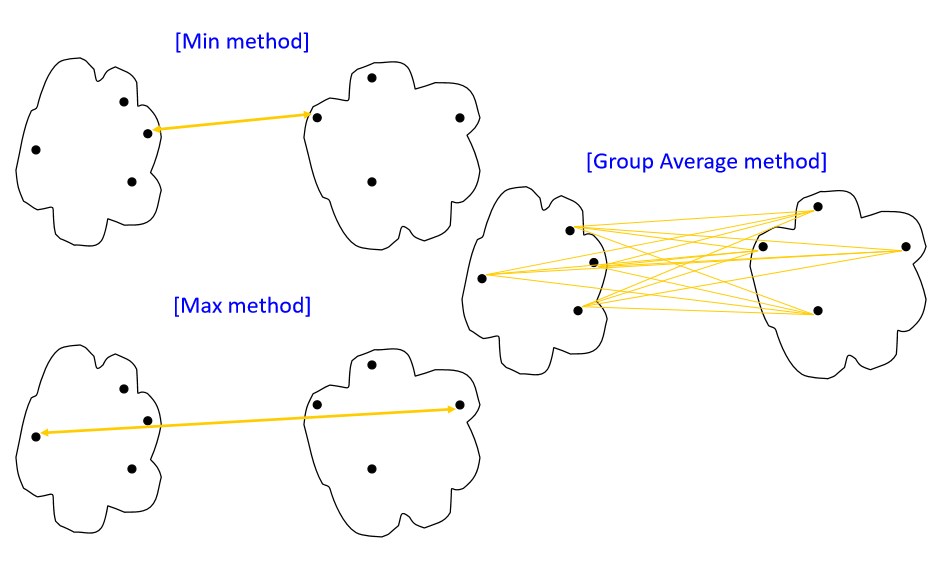

여기서 거리를 구하는 방법이 다른 것이지 merge하는 과정은 가장 가까운 것과 연결해야 한다.


위와 같은 알고리즘과 거리방식을 통해 코드를 구현한다.


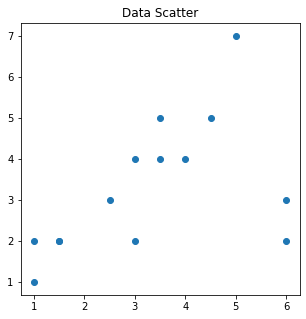

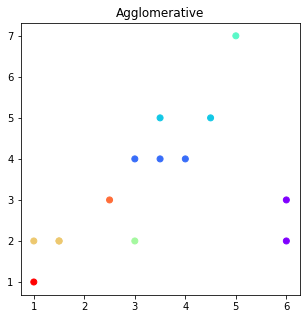

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

my_data_3 = np.array([[1.0 ,1.0],
                    [1.5,2.0],
                    [3.0,4.0],
                    [5.0,7.0],
                    [3.5,5.0],
                    [4.5,5.0],
                    [1.5,2.0],
                    [3.5,4.0],
                    [2.5,3.0],
                    [6.0,3.0],
                    [1.0,2.0],
                    [3.0,2.0],
                    [6.0,2.0],
                    [4.0,4.0]])
fig , ax1 = plt.subplots(1,figsize = (5,5))
ax1.set_title("Data Scatter")
ax1.scatter(my_data_2[:,0],my_data_2[:,1])

AgglomerativeCluster = AgglomerativeClustering(n_clusters=8, affinity="Euclidean", linkage="complete").fit(my_data_3)

labels_3 = AgglomerativeCluster.labels_
# 라벨 값들


fig , ax1 = plt.subplots(1,figsize = (5,5))

ax1.set_title("Agglomerative")
ax1.scatter(my_data_3[:,0],my_data_3[:,1],c=labels_3 ,cmap = "rainbow")

계층 알고리즘에도 한계가 존재한다.

- 계층알고리즘이 진행하면서 두 클러스터가 하나로 합치는 경우에는 뒤로 되돌릴 수 없다.

- 노이즈에 대한 민감도가 있고 다양한 크기에 대한 클러스터를 처리하기가 어렵고, 큰 클러스터를 끊기가 어렵다.

# 요약

우리는 어떠한 데이터에 대해서 그룹화를 하기 위해 Clustering algorithm을 이용한다.

특정한 기준이 없어도 데이터의 유사도를 통해 군집을 한다. 군집화 알고리즘에는 다양한 알고리즘이 있다.

부분 군집화에서 특정 클러스터를 제한하고 싶으면 Kmeans를 이용하고

부분 군집화에서 클러스터를 제한하지 않고 특정 영역과 최소 점의 개수를 통해서 군집화 하고 싶으면 DBSCAN

계층 군집화에서 하나의 큰 클러스터로 합치고 싶으면 Agglomerative 를 이용한다.

하지만 각 알고리즘 마다 장단점이 존재하기에 잘 활용하여 군집화를 진행해야 한다.